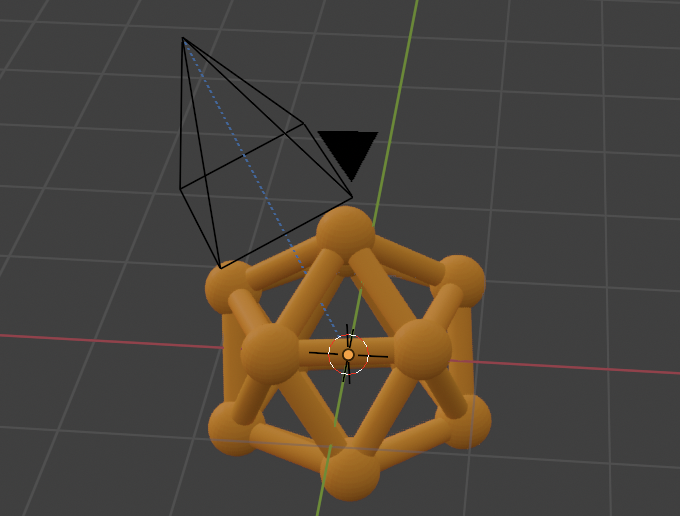

In [26]:
import bpy
import bmesh

blend_file_path = "n3c_satyrn_roate_camera_change_color.blend"
bpy.ops.wm.open_mainfile(filepath=blend_file_path)

def draw_network(node_positions, edges, sphere_radius = 4.4):
    # Create a new mesh and object
    mesh = bpy.data.meshes.new("GraphMesh")
    obj = bpy.data.objects.new("GraphObject", mesh)
    bpy.context.collection.objects.link(obj)
    
    # Create a BMesh to add vertices and edges
    bm = bmesh.new()
    bm_verts = []
    for key, co in sorted(node_positions.items()):
        bm_verts.append(bm.verts.new(co))
    
    # Add edges
    for edge in edges:
        v1, v2 = edge
        bm.edges.new((bm_verts[v1], bm_verts[v2]))
    
    # Write the bmesh to the mesh
    bm.to_mesh(mesh)
    
    # Apply the Geometry Nodes modifier
    modifier = obj.modifiers.new(name="GeometryNodes", type='NODES')
    modifier.node_group = bpy.data.node_groups["default_node"]
    
    modifier["Socket_2"] = 2.2
    modifier["Socket_3"] = sphere_radius

In [27]:
bpy.ops.screen.animation_play()

{'FINISHED'}

In [28]:
netw = bpy.data.objects.get('GraphObject')
netw_modif = netw.modifiers["GeometryNodes"]
netw_modif["Socket_2"]= 1.0
bpy.context.object.data.update()

In [29]:
netw_modif["Socket_2"]= 9.5
bpy.context.object.data.update()

In [30]:
material2 = bpy.data.materials.get("Material2")
for node in netw_modif.node_group.nodes:
    if node.type == 'SET_MATERIAL':
        node.inputs['Material'].default_value = material2

In [31]:
netw_modif["Socket_3"]= 22.0
bpy.context.object.data.update()

Read blend: "/Users/jan-hendrik/projects/ipyblender-experimental/n3c_satyrn_roate_camera_change_color.blend"
Read blend: "/Users/jan-hendrik/projects/ipyblender-experimental/n3c_satyrn_roate_camera_change_color.blend"
Info: Saved "n3c_satyrn_roate_camera_change_color.blend"


: 

In [25]:
material1 = bpy.data.materials.get("Material1")
for node in netw_modif.node_group.nodes:
    if node.type == 'SET_MATERIAL':
        node.inputs['Material'].default_value = material1


netw_modif["Socket_2"]= 2.0
netw_modif["Socket_3"]= 3.5
bpy.context.object.data.update()